In [56]:
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Setup
PROJECT_ROOT = Path.cwd().parent
RAW_DATA_PATH = PROJECT_ROOT / "data/raw"
NUCLE_PATH = str(RAW_DATA_PATH / 'nucle')
CONLL14_PATH = str(RAW_DATA_PATH / 'conll2014')

sys.path.append(str(PROJECT_ROOT))
from src.spellchecker.data.parsers.sgml_parser import load_sgml_annotations, extract_sgml_sentences

In [ ]:
# Load data
nucle_annotations = load_sgml_annotations(NUCLE_PATH)
conll_annotations = load_sgml_annotations(CONLL14_PATH)
nucle_sentences = extract_sgml_sentences(NUCLE_PATH)
conll_sentences = extract_sgml_sentences(CONLL14_PATH)

all_annotations = pd.concat([nucle_annotations, conll_annotations], ignore_index=True)
all_sentences = pd.concat([nucle_sentences, conll_sentences], ignore_index=True)

In [61]:
# Basic stats
print(f"Annotations: {len(all_annotations):,}")
print(f"Sentences: {len(all_sentences):,}")
print(f"Mec errors: {len(all_annotations[all_annotations['error_type'] == 'Mec'])}")

Annotations: 16,100
Sentences: 5,844
Mec errors: 1133


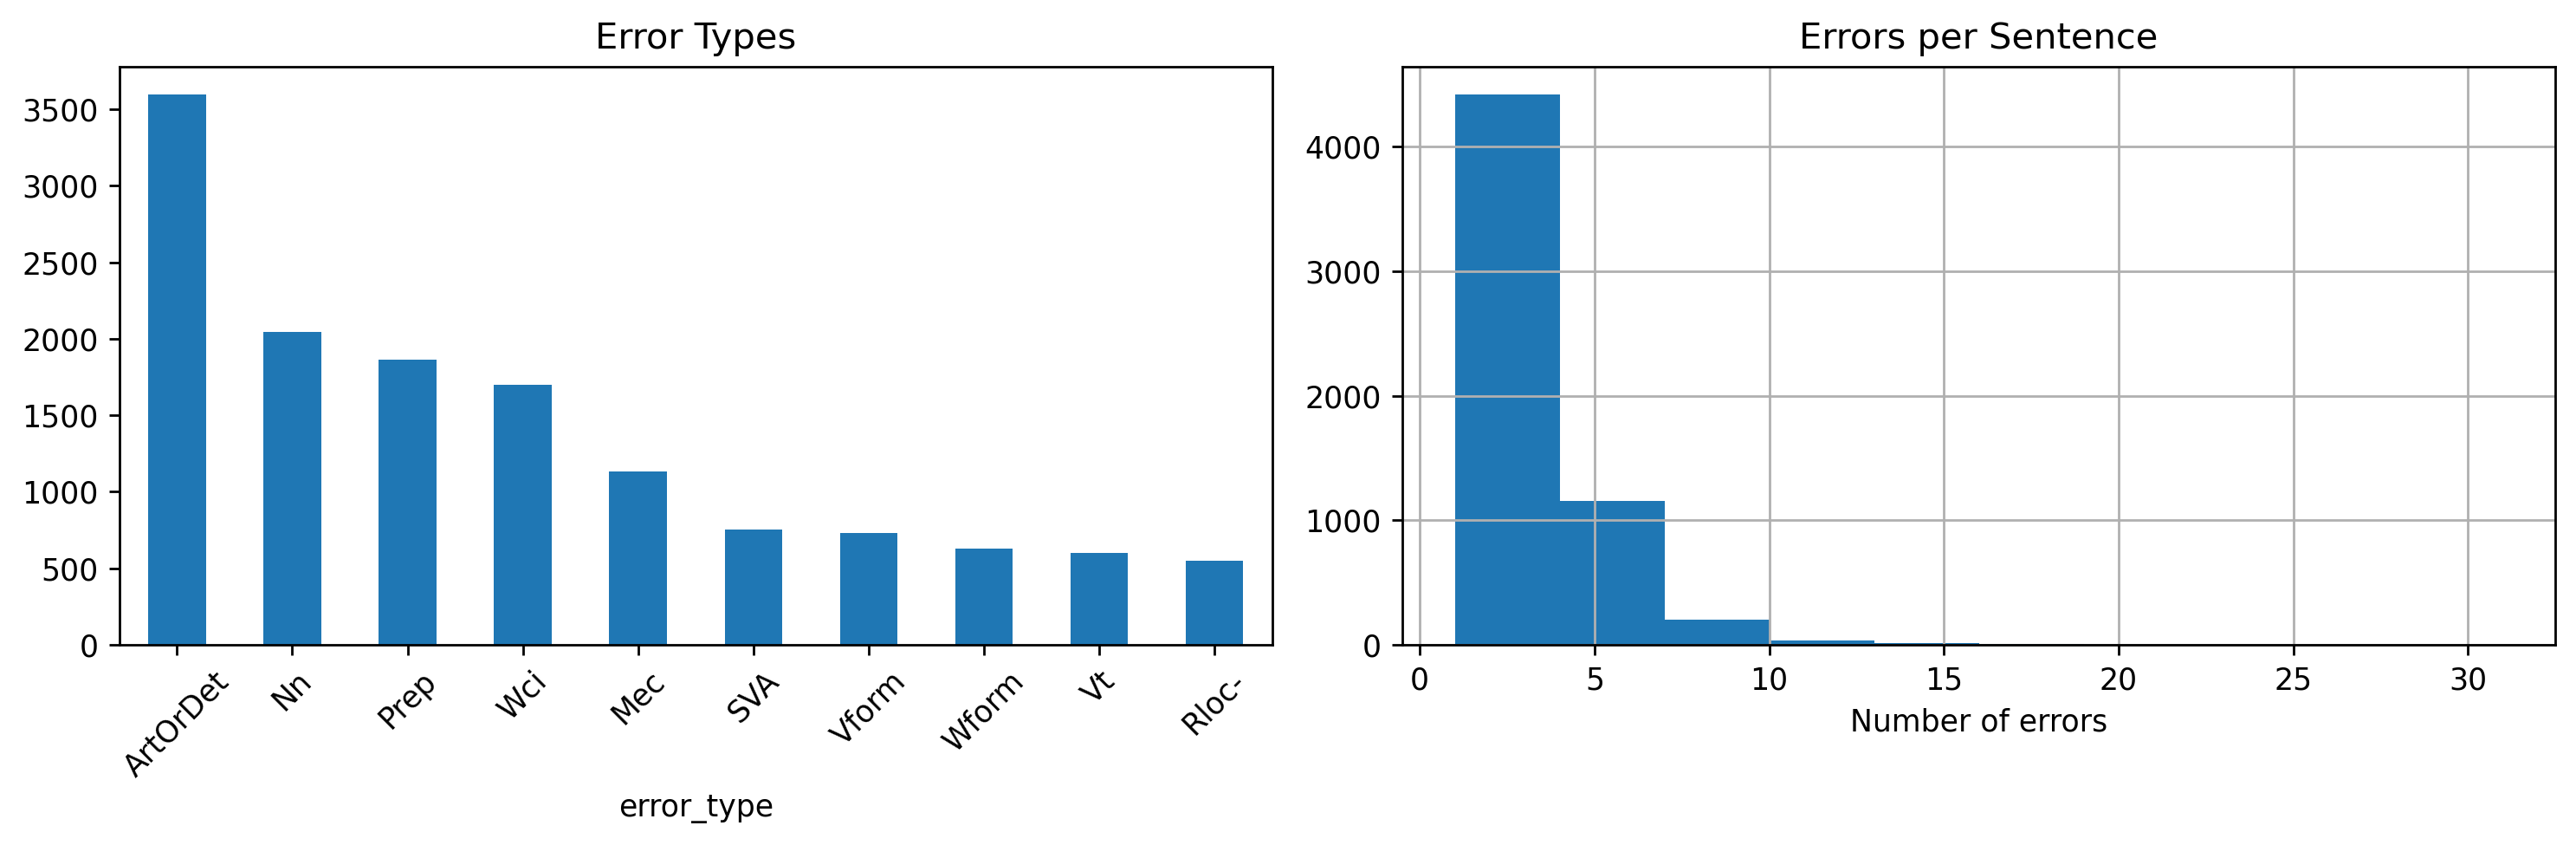

In [60]:
# Error type distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), dpi=250)

all_annotations['error_type'].value_counts().head(10).plot(kind='bar', ax=ax1)
ax1.set_title('Error Types')
ax1.tick_params(axis='x', rotation=45)

all_sentences['num_errors'].hist(bins=10, ax=ax2)
ax2.set_title('Errors per Sentence')
ax2.set_xlabel('Number of errors')

plt.tight_layout()
plt.show()

SEC Dataset Extraction Potential:
Total sentences: 5,844
Sentences with SEC errors: 859
Sentences with Mec errors: 848
Pure Mec sentences: 95


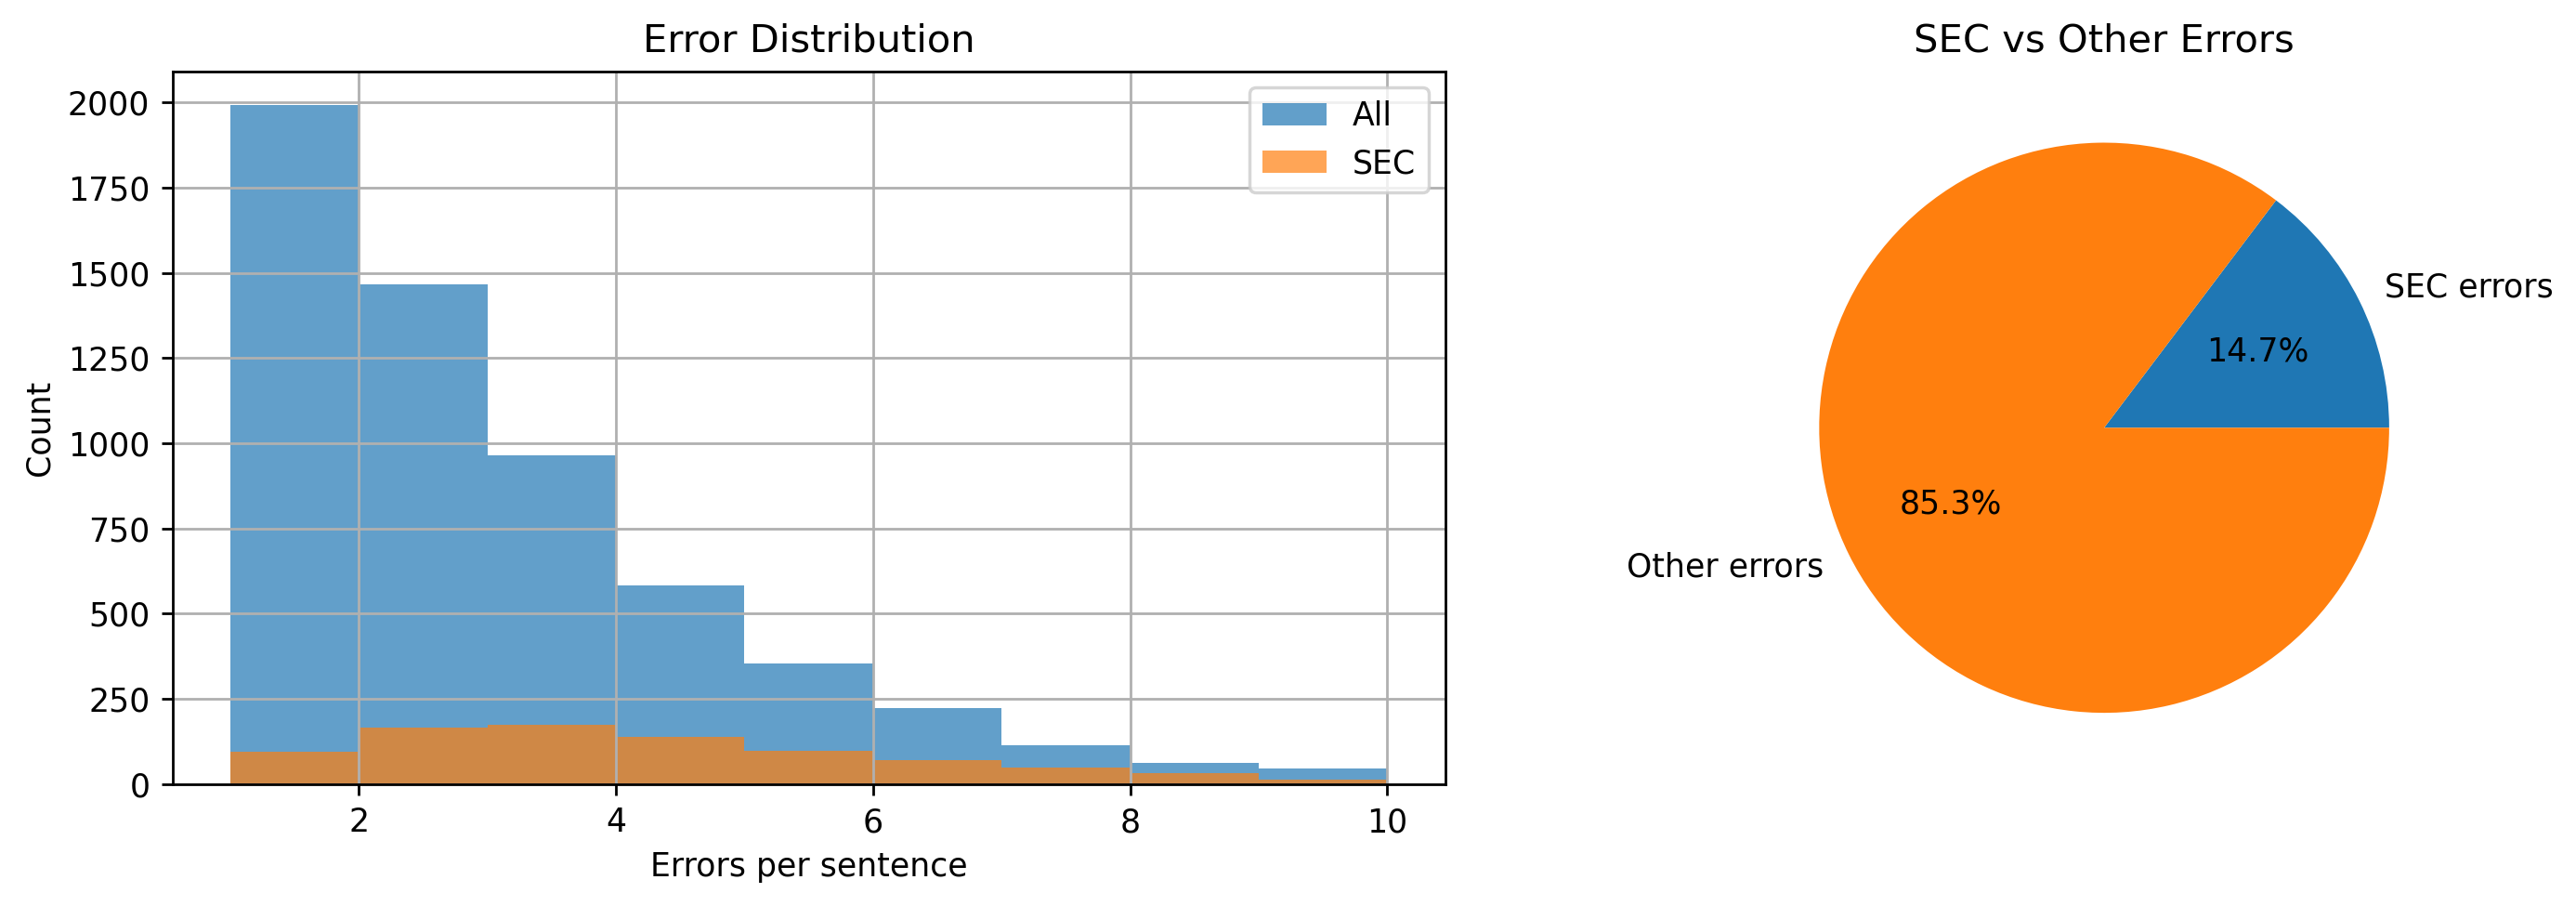


Sample SEC sentences:


,source_sentence,target_sentence,error_types
819,"In modern digital world, electronic products a...","In the modern digital world, electronic produc...","[ArtOrDet, Nn, Mec]"
820,"In work places, electronic devices such as com...","In ce places, electronic devices, such as comp...","[ArtOrDet, Mec, Mec, Mec, Rloc-]"
823,Surveillance technology such as RFID (radio-fr...,"Surveillance technology, such as RFID (radio-f...","[Mec, Mec, Rloc-, Nn, Vt, WOadv]"
824,"In this essay, I will discuss that if surveill...","In this essay, I will discuss surveillance te...","[Trans, Ssub, Mec, Mec, V0]"
825,"Personally, I agree to a large extent that sur...","Personally, I agree to a large extent that sur...","[Mec, Mec]"


In [65]:
def has_sec_errors(error_types):
    sec_types = ['Mec', 'Wa']  # Mechanics and Acronyms
    return any(error_type in sec_types for error_type in error_types)

all_sentences['has_sec'] = all_sentences['error_types'].apply(has_sec_errors)
all_sentences['mec_only'] = all_sentences['error_types'].apply(lambda x: x == ['Mec'] or x == ['Wa'])

# SEC extraction potential
sec_sentences = all_sentences[all_sentences['has_sec']]
mec_sentences = all_sentences[all_sentences['error_types'].apply(lambda x: 'Mec' in x)]

print("SEC Dataset Extraction Potential:")
print(f"Total sentences: {len(all_sentences):,}")
print(f"Sentences with SEC errors: {len(sec_sentences):,}")
print(f"Sentences with Mec errors: {len(mec_sentences):,}")
print(f"Pure Mec sentences: {len(all_sentences[all_sentences['mec_only']]):,}")

# Error count distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), dpi=250)

# Errors per sentence
all_sentences['num_errors'].hist(bins=range(1, 11), ax=ax1, alpha=0.7, label='All')
sec_sentences['num_errors'].hist(bins=range(1, 11), ax=ax1, alpha=0.7, label='SEC')
ax1.set_xlabel('Errors per sentence')
ax1.set_ylabel('Count')
ax1.set_title('Error Distribution')
ax1.legend()

# SEC vs non-SEC
sec_counts = pd.Series({
    'SEC errors': len(sec_sentences),
    'Other errors': len(all_sentences) - len(sec_sentences)
})
sec_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%')
ax2.set_title('SEC vs Other Errors')

plt.tight_layout()
plt.show()

# Sample SEC sentences
print("\nSample SEC sentences:")
sec_sentences.head()[['source_sentence', 'target_sentence', 'error_types']].head()